<img src="https://news.illinois.edu/files/6367/543635/116641.jpg" alt="University of Illinois" width="250"/>

##Drug Overdose Deaths
###Data Exploration

* Akshat Bhardwaj <akshatb4@illinois.edu>,
[LinkedIn](https://www.linkedin.com/in/akshat-bhardwaj/)
* Catherine Li <sl182@illinois.edu>,
[LinkedIn](https://www.linkedin.com/in/catherine-li-482797252/)
* Hélène Rondey <hrondey2@illinois.edu>,
[LinkedIn](https://www.linkedin.com/in/h%C3%A9l%C3%A8ne-r-98401a1b7?lipi=urn%3Ali%3Apage%3Ad_flagship3_profile_view_base_contact_details%3BzsAqgF02Qd2grkWQ0eXwXg%3D%3D)
* Yang-Hsuan Huang <yhh4@illinois.edu>,
[LinkedIn](https://www.linkedin.com/in/yang-hsuan-huang-904148281?lipi=urn%3Ali%3Apage%3Ad_flagship3_profile_view_base_contact_details%3BCxCLmEzYQqKYAfU3aoIUug%3D%3D)


In [ ]:
import numpy as np
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import warnings
warnings.simplefilter('ignore')

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
%cd /content/drive/MyDrive/Deep_Dive_Group_1
#%cd /content/drive/Shareddrives/Deep_Dive_Group_1

/content/drive/.shortcut-targets-by-id/1su1C9z7-CohyDB0MZwglHgWYLLSOfSuS/Deep_Dive_Group_1


In [ ]:
table = pd.read_csv("working_dataset.csv", thousands=',')
table= table.rename(columns={'Data Value' : 'Data_value',
              'Percent Complete': "Percent_complete",
              'Percent Pending Investigation': "Percent_pending_investigation",
              'State Name': "State_name",
              'Footnote Symbol': "Footnote_symbol",
              'Predicted Value': "Predicted_value"})
table


,State,Year,Month,Period,Indicator,Data_value,Percent_complete,Percent_pending_investigation,State_name,Footnote,Footnote_symbol,Predicted_value
0,AK,2015,April,12 month-ending,"Natural, semi-synthetic, & synthetic opioids, ...",NaN,100,0.000000,Alaska,Numbers may differ from published reports usin...,**,NaN
1,AK,2015,April,12 month-ending,"Synthetic opioids, excl. methadone (T40.4)",NaN,100,0.000000,Alaska,Numbers may differ from published reports usin...,**,NaN
2,AK,2015,April,12 month-ending,Heroin (T40.1),NaN,100,0.000000,Alaska,Numbers may differ from published reports usin...,**,NaN
3,AK,2015,April,12 month-ending,Cocaine (T40.5),NaN,100,0.000000,Alaska,Numbers may differ from published reports usin...,**,NaN
4,AK,2015,April,12 month-ending,Number of Drug Overdose Deaths,126.0,100,0.000000,Alaska,Numbers may differ from published reports usin...,**,126.0
...,...,...,...,...,...,...,...,...,...,...,...,...
59995,YC,2023,March,12 month-ending,Methadone (T40.3),300.0,100,0.658376,New York City,Underreported due to incomplete data.,*,323.0
59996,YC,2023,March,12 month-ending,"Opioids (T40.0-T40.4,T40.6)",2520.0,100,0.658376,New York City,Underreported due to incomplete data.,*,2730.0
59997,YC,2023,March,12 month-ending,"Synthetic opioids, excl. methadone (T40.4)",2364.0,100,0.658376,New York City,Underreported due to incomplete data.,*,2578.0
59998,YC,2023,March,12 month-ending,Cocaine (T40.5),1493.0,100,0.658376,New York City,Underreported due to incomplete data.,*,1617.0


In [ ]:
print(table.dtypes)

State                             object
Year                               int64
Month                             object
Period                            object
Indicator                         object
Data_value                       float64
Percent_complete                  object
Percent_pending_investigation    float64
State_name                        object
Footnote                          object
Footnote_symbol                   object
Predicted_value                  float64
dtype: object


In [ ]:
table = table.convert_dtypes()
#print(table.dtypes)

In [ ]:
table.isna().sum()

State                                0
Year                                 0
Month                                0
Period                               0
Indicator                            0
Data_value                       10996
Percent_complete                     0
Percent_pending_investigation        0
State_name                           0
Footnote                          4662
Footnote_symbol                   4800
Predicted_value                  21326
dtype: int64

In [ ]:
print(table['Indicator'].unique())

<StringArray>
['Natural, semi-synthetic, & synthetic opioids, incl. methadone (T40.2-T40.4)',
                                  'Synthetic opioids, excl. methadone (T40.4)',
                                                              'Heroin (T40.1)',
                                                             'Cocaine (T40.5)',
                                              'Number of Drug Overdose Deaths',
            'Natural & semi-synthetic opioids, incl. methadone (T40.2, T40.3)',
                                                'Percent with drugs specified',
                                                            'Number of Deaths',
                                    'Natural & semi-synthetic opioids (T40.2)',
                                                 'Opioids (T40.0-T40.4,T40.6)',
                                                           'Methadone (T40.3)',
                               'Psychostimulants with abuse potential (T43.6)']
Length: 12, dtype: string


We can find that the 'indicator' includes not just drug type, but also 'Number of Drug Overdose Deaths', 'Number of Deaths' and 'Percent with drugs specified'. The 'Number of Drug Overdose Deaths' is the feature we want to predict.
Also, the 'Natural & semi-synthetic opioids, incl. methadone (T40.2, T40.3)' and 'Natural, semi-synthetic, & synthetic opioids, incl. methadone (T40.2-T40.4)' are overlap with other drug classes.

In [ ]:
table['State'].unique()

<StringArray>
['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA',
 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS',
 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA',
 'RI', 'SC', 'SD', 'TN', 'TX', 'US', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY',
 'YC']
Length: 53, dtype: string

In [ ]:
table[table['State']=='US']

,State,Year,Month,Period,Indicator,Data_value,Percent_complete,Percent_pending_investigation,State_name,Footnote,Footnote_symbol,Predicted_value
49200,US,2015,April,12 month-ending,"Natural, semi-synthetic, & synthetic opioids, ...",20124.0,100,0.146454,United States,Numbers may differ from published reports usin...,**,20438
49201,US,2015,April,12 month-ending,"Synthetic opioids, excl. methadone (T40.4)",6868.0,100,0.146454,United States,Numbers may differ from published reports usin...,**,6985
49202,US,2015,April,12 month-ending,Heroin (T40.1),11471.0,100,0.146454,United States,Numbers may differ from published reports usin...,**,11635
49203,US,2015,April,12 month-ending,Cocaine (T40.5),5908.0,100,0.146454,United States,Numbers may differ from published reports usin...,**,6009
49204,US,2015,April,12 month-ending,Number of Drug Overdose Deaths,48748.0,100,0.146454,United States,Numbers may differ from published reports usin...,**,49387
...,...,...,...,...,...,...,...,...,...,...,...,...
50395,US,2023,March,12 month-ending,Methadone (T40.3),3284.0,100,0.324791,United States,Underreported due to incomplete data.,*,3415
50396,US,2023,March,12 month-ending,"Opioids (T40.0-T40.4,T40.6)",81290.0,100,0.324791,United States,Underreported due to incomplete data.,*,84456
50397,US,2023,March,12 month-ending,"Synthetic opioids, excl. methadone (T40.4)",73894.0,100,0.324791,United States,Underreported due to incomplete data.,*,77105
50398,US,2023,March,12 month-ending,Cocaine (T40.5),27999.0,100,0.324791,United States,Underreported due to incomplete data.,*,29099


There is 'US' in the feature 'State', which sums up the number of deaths around the whole US each month. We should drop these rows.

In [ ]:
#combine the Year and Month to a new column
table['Date'] = pd.to_datetime(table.Year.astype(str) + '/' + table.Month.astype(str))
table['Date'] = table['Date'].dt.strftime('%Y-%m')

In [ ]:
table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          60000 non-null  string 
 1   Year                           60000 non-null  Int64  
 2   Month                          60000 non-null  string 
 3   Period                         60000 non-null  string 
 4   Indicator                      60000 non-null  string 
 5   Data_value                     49004 non-null  Float64
 6   Percent_complete               60000 non-null  string 
 7   Percent_pending_investigation  60000 non-null  Float64
 8   State_name                     60000 non-null  string 
 9   Footnote                       55338 non-null  string 
 10  Footnote_symbol                55200 non-null  string 
 11  Predicted_value                38674 non-null  Int64  
 12  Date                           60000 non-null 

In [ ]:
table.describe()

,Year,Data_value,Percent_pending_investigation,Predicted_value
count,60000.0,49004.0,60000.0,38674.0
mean,2018.68,13339.327654,0.116139,1440.290997
std,2.41199,137889.62016,0.161246,6434.289125
min,2015.0,10.0,0.0,10.0
25%,2017.0,96.394823,0.016976,100.0
50%,2019.0,315.0,0.052442,318.0
75%,2021.0,1263.0,0.153227,854.0
max,2023.0,3538076.0,1.610931,111355.0


In [ ]:
# Table of Drug Overdose Deaths Number
df1 = table[table['Indicator']=='Number of Drug Overdose Deaths'][table['State']!='US']

In [ ]:
df1

,State,Year,Month,Period,Indicator,Data_value,Percent_complete,Percent_pending_investigation,State_name,Footnote,Footnote_symbol,Predicted_value,Date
4,AK,2015,April,12 month-ending,Number of Drug Overdose Deaths,126.0,100,0.0,Alaska,Numbers may differ from published reports usin...,**,126,2015-04
22,AK,2015,August,12 month-ending,Number of Drug Overdose Deaths,124.0,100,0.0,Alaska,Numbers may differ from published reports usin...,**,124,2015-08
29,AK,2015,December,12 month-ending,Number of Drug Overdose Deaths,121.0,100,0.0,Alaska,Numbers may differ from published reports usin...,**,121,2015-12
44,AK,2015,February,12 month-ending,Number of Drug Overdose Deaths,127.0,100,0.0,Alaska,Numbers may differ from published reports usin...,**,127,2015-02
49,AK,2015,January,12 month-ending,Number of Drug Overdose Deaths,126.0,100,0.0,Alaska,Numbers may differ from published reports usin...,**,126,2015-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59948,YC,2022,September,12 month-ending,Number of Drug Overdose Deaths,2999.0,100,0.069521,New York City,<NA>,<NA>,3014,2022-09
59953,YC,2023,April,12 month-ending,Number of Drug Overdose Deaths,2820.0,100,1.172133,New York City,Underreported due to incomplete data.,*,3262,2023-04
59967,YC,2023,February,12 month-ending,Number of Drug Overdose Deaths,3106.0,100,0.31576,New York City,Underreported due to incomplete data.,*,3206,2023-02
59982,YC,2023,January,12 month-ending,Number of Drug Overdose Deaths,3121.0,100,0.215755,New York City,Underreported due to incomplete data.,*,3172,2023-01


In [ ]:
df1.isna().sum()

State                              0
Year                               0
Month                              0
Period                             0
Indicator                          0
Data_value                         0
Percent_complete                   0
Percent_pending_investigation      0
State_name                         0
Footnote                         416
Footnote_symbol                  416
Predicted_value                    0
Date                               0
dtype: int64

Ignore the NA of the Footnote and Footnote_symbol because they won’t be used as our features.

In [ ]:
df1.describe()

,Year,Data_value,Percent_pending_investigation,Predicted_value
count,5200.0,5200.0,5200.0,5200.0
mean,2018.68,1482.866731,0.114655,1506.742308
std,2.412202,1592.318036,0.159649,1632.522091
min,2015.0,55.0,0.0,55.0
25%,2017.0,372.0,0.016757,374.0
50%,2019.0,1008.5,0.050992,1015.0
75%,2021.0,2166.0,0.153916,2215.0
max,2023.0,11766.0,1.610931,12542.0


From 2015 to 2023, on average, 1483 people die from drug overdoses each year. We can see the monthly overdose death from each state, but the counts are insensitive to variations by seasonality, so we decided to focus on the difference between the states and the yearly trends.

In [ ]:
# Table of Deaths Number for each drug class
from numpy.ma.extras import isin
df2 = table[~table['Indicator'].isin(['Number of Deaths','Number of Drug Overdose Deaths','Percent with drugs specified','Natural & semi-synthetic opioids, incl. methadone (T40.2, T40.3)','Natural, semi-synthetic, & synthetic opioids, incl. methadone (T40.2-T40.4)'])][table['State']!='US']

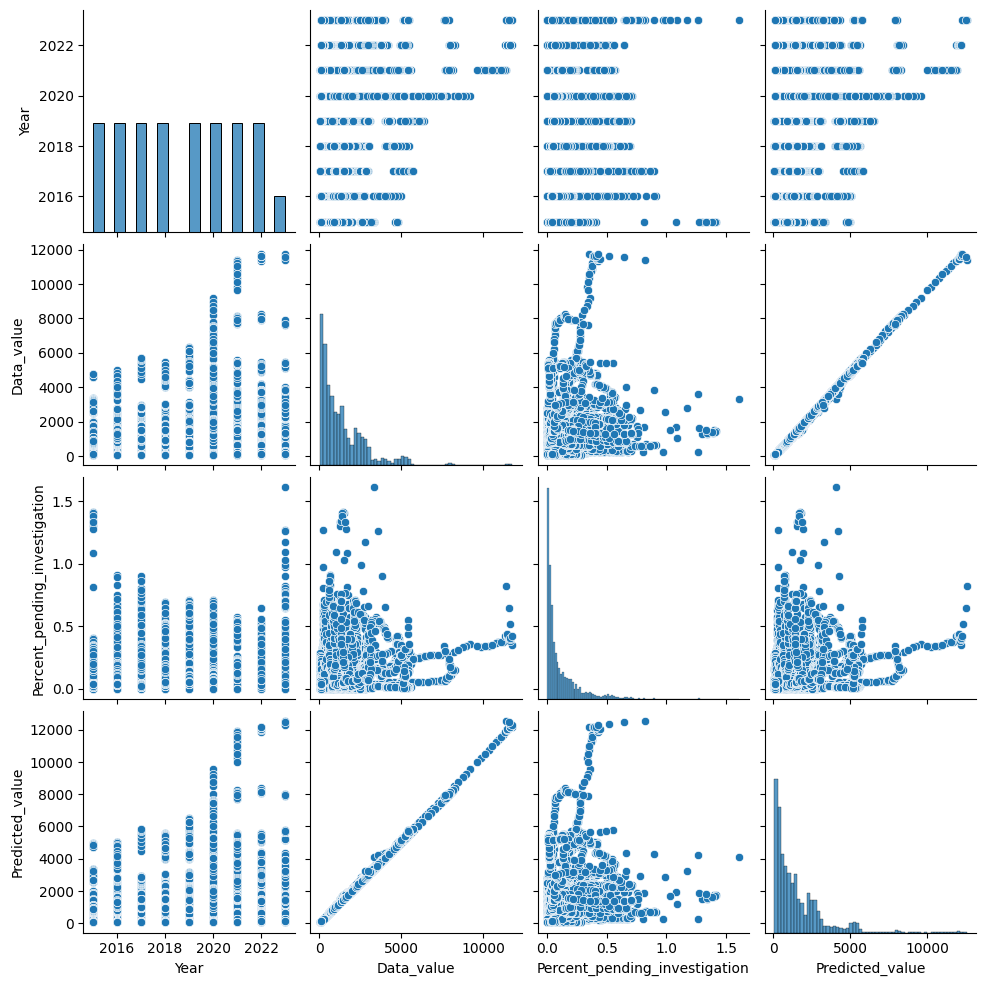

In [ ]:
#Check the correlation between different features
sns.pairplot(df1)

In [ ]:
df1['Date'] = pd.to_datetime(df1['Date'], format='%Y-%m')

In [ ]:
df2['Date'] = pd.to_datetime(df2['Date'], format='%Y-%m')

In [ ]:
#Provisional Number of Drug Overdose Deaths
table1 = pd.pivot_table(df1,values = 'Data_value',index = 'Date',aggfunc='sum')
data_sum = table1.reset_index()

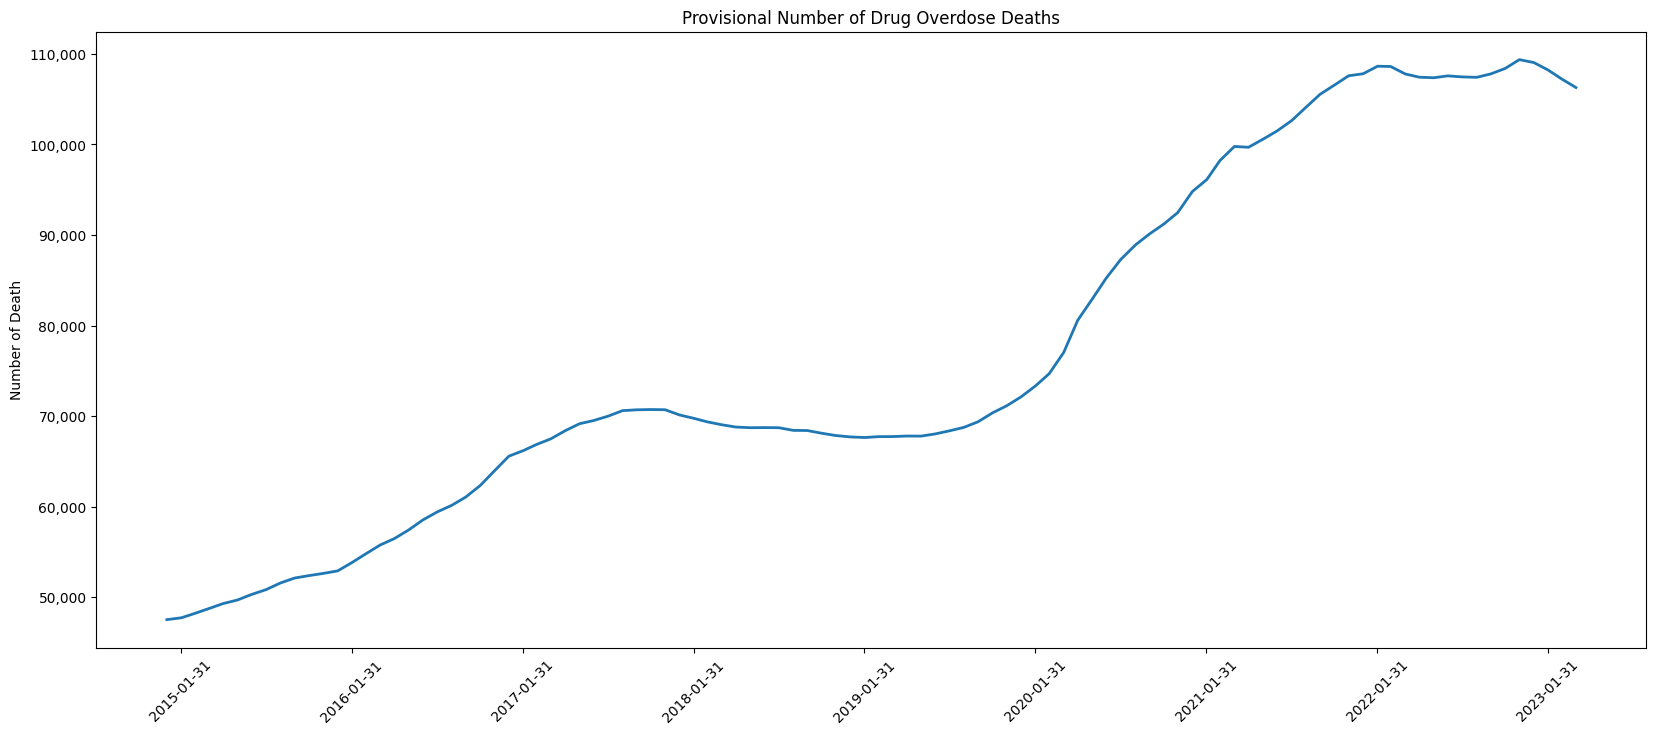

In [ ]:
import matplotlib.ticker as ticker

# Plotting the data with formatted y-axis labels
plt.figure(figsize=(20, 8))
plt.plot(data_sum['Date'], data_sum['Data_value'], linewidth=2)

# Setting xticks to display only the first month of each year
plt.xticks(pd.date_range('2015-01', '2023-04', freq='12M'), rotation=45)

# Formatting y-axis labels to include commas for thousands
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.ylabel('Number of Death')
plt.title('Provisional Number of Drug Overdose Deaths')
plt.show()

In [ ]:
#Provisional Number of Drug Overdose Deaths Per State(unnormalized data)
table2 = pd.pivot_table(df1,values = 'Data_value',index = 'State',aggfunc='sum')
data_state = table2.reset_index()

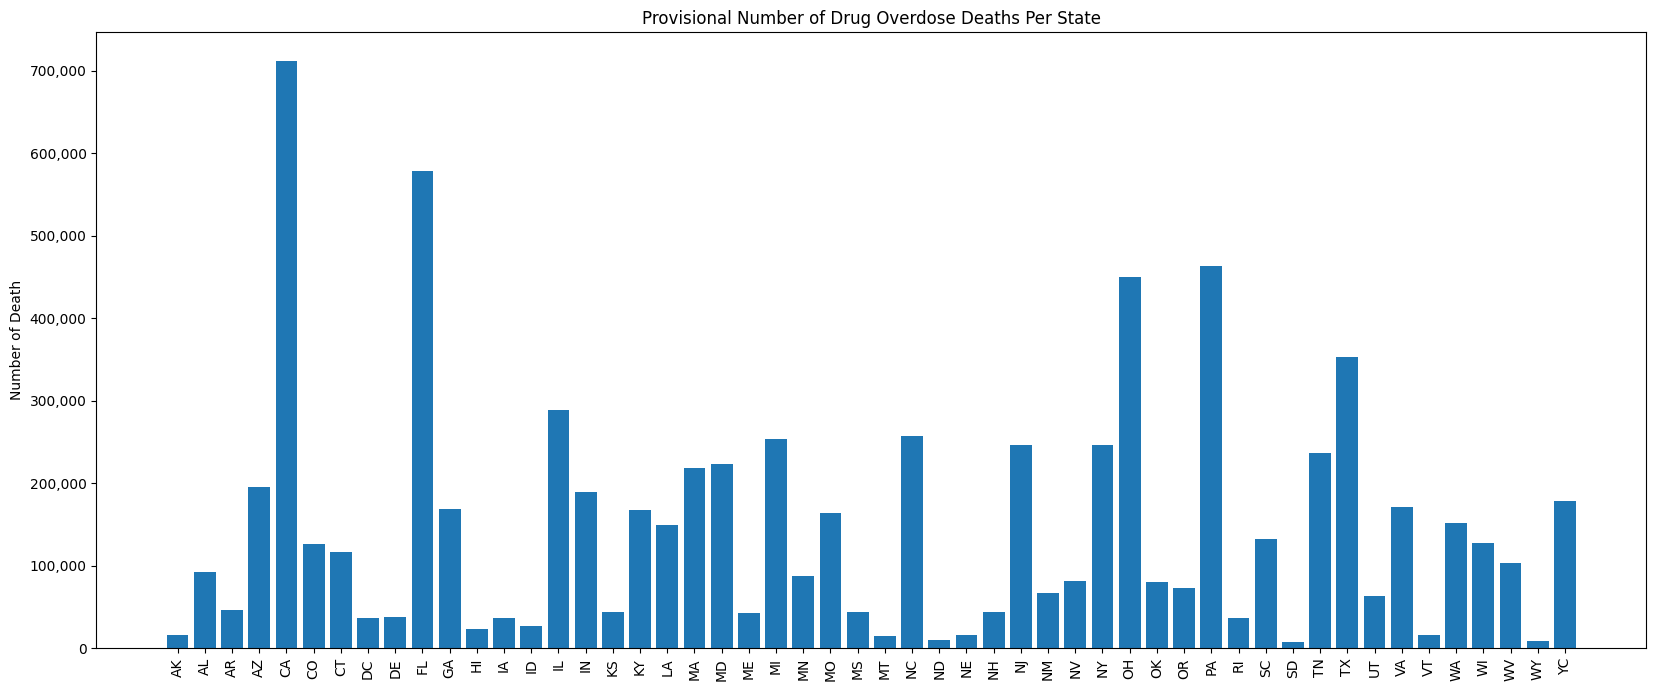

In [ ]:
plt.figure(figsize=(20,8))
plt.bar(data_state['State'],data_state['Data_value'])
plt.xticks(rotation=90)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.ylabel('Number of Death')
plt.title('Provisional Number of Drug Overdose Deaths Per State')
plt.show()

We can observe that CA, FL, OH and PA have the highest number

To remove the effect of state total population on death counts, we need to adjust the death counts based on population size.
The data source of population: https://www.statsamerica.org/sip/rank_list.aspx?rank_label=pop1&ct=S18

In [ ]:
Pop = pd.DataFrame({
    'State': ['CA','TX','FL','NY','PA','IL','OH','GA','NC','MI','NJ','VA','WA','AZ','TN','MA','ID','MO','MD','WI','CO','MN','SC','AL','LA','KY','OR','OK',\
              'CT','UT','IA','NV','AR','MS','KS','NM','NE','ID','WV','HI','NH','ME','MT','RI','DE','SD','ND','AK','DC','VT','WY','YC'],
    'Population': [39029342,30029572,22244823,19677151,12972008,12582032,11756058,10912876,10698973,10034113,9261699,8683619,7785786,7359197,7051339,6981974,\
                   6833037,6177957,6164660,5892539,5839926,5717184,5282634,5074296,4590241,4512310,4240137,4019800,3626205,3380800,3200517,3177772,3045637,\
                   2940057,2937150,2113344,1967923,1939033,1775156,1440196,1395231,1385340,1122867,1093734,1018396,909824,779261,733583,671803,647064,581381,8335897]})

In [ ]:
inner_merged_total = pd.merge(data_state, Pop, on=['State'])

In [ ]:
inner_merged_total['death_rate_per_100k'] = (inner_merged_total['Data_value'] / inner_merged_total['Population']) * 100000

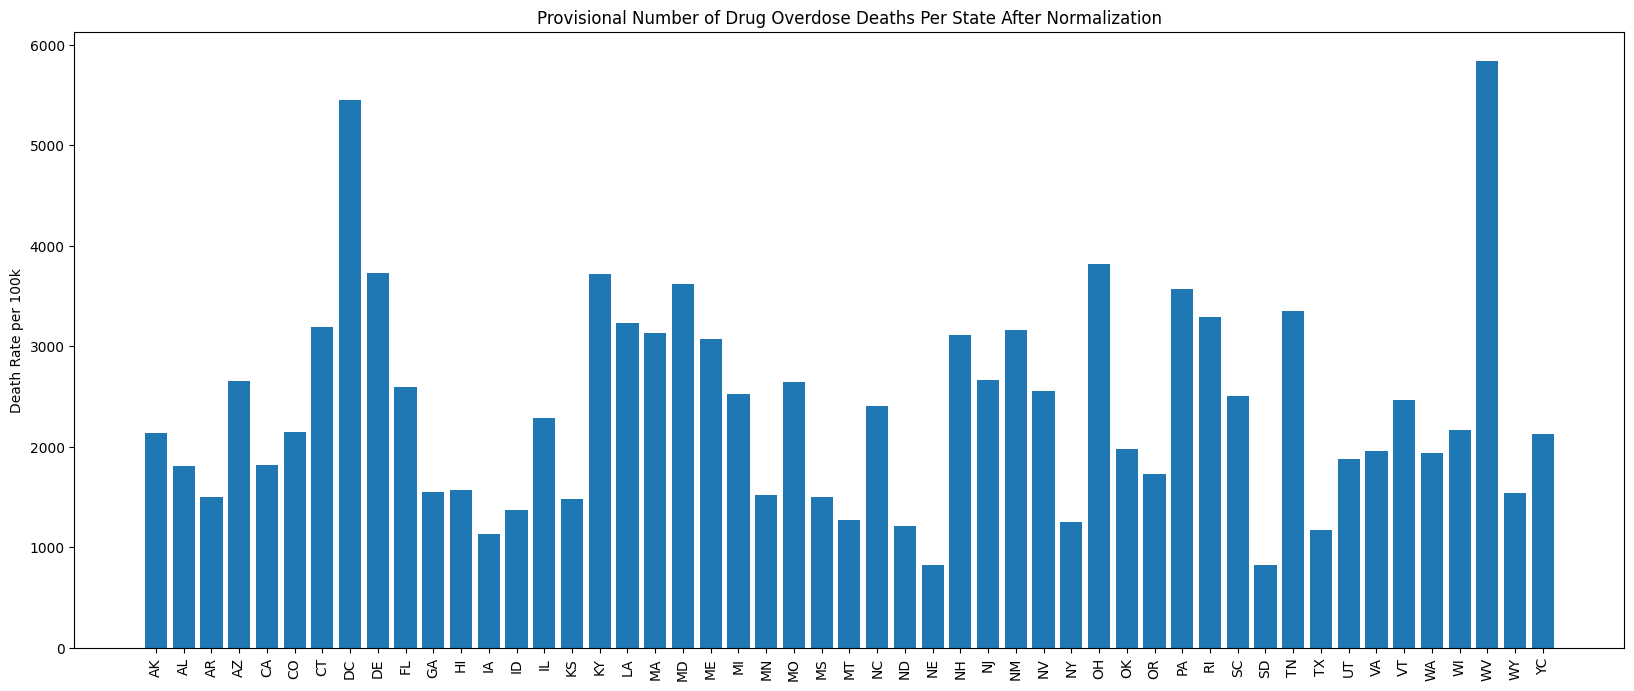

In [ ]:
plt.figure(figsize=(20,8))
plt.bar(inner_merged_total['State'],inner_merged_total['death_rate_per_100k'])
plt.xticks(rotation=90)
#plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.ylabel('Death Rate per 100k')
plt.title('Provisional Number of Drug Overdose Deaths Per State After Normalization')
plt.show()

In [ ]:
#Provisional Number of Drug Overdose Deaths by Drug or Drug Class
table3 = pd.pivot_table(df2,values = 'Data_value',index = ['Indicator','Date'],aggfunc='sum')
data_drug = table3.reset_index()

Text(0.5, 1.0, 'Provisional Number of Drug Overdose Deaths by Drug or Drug Class')

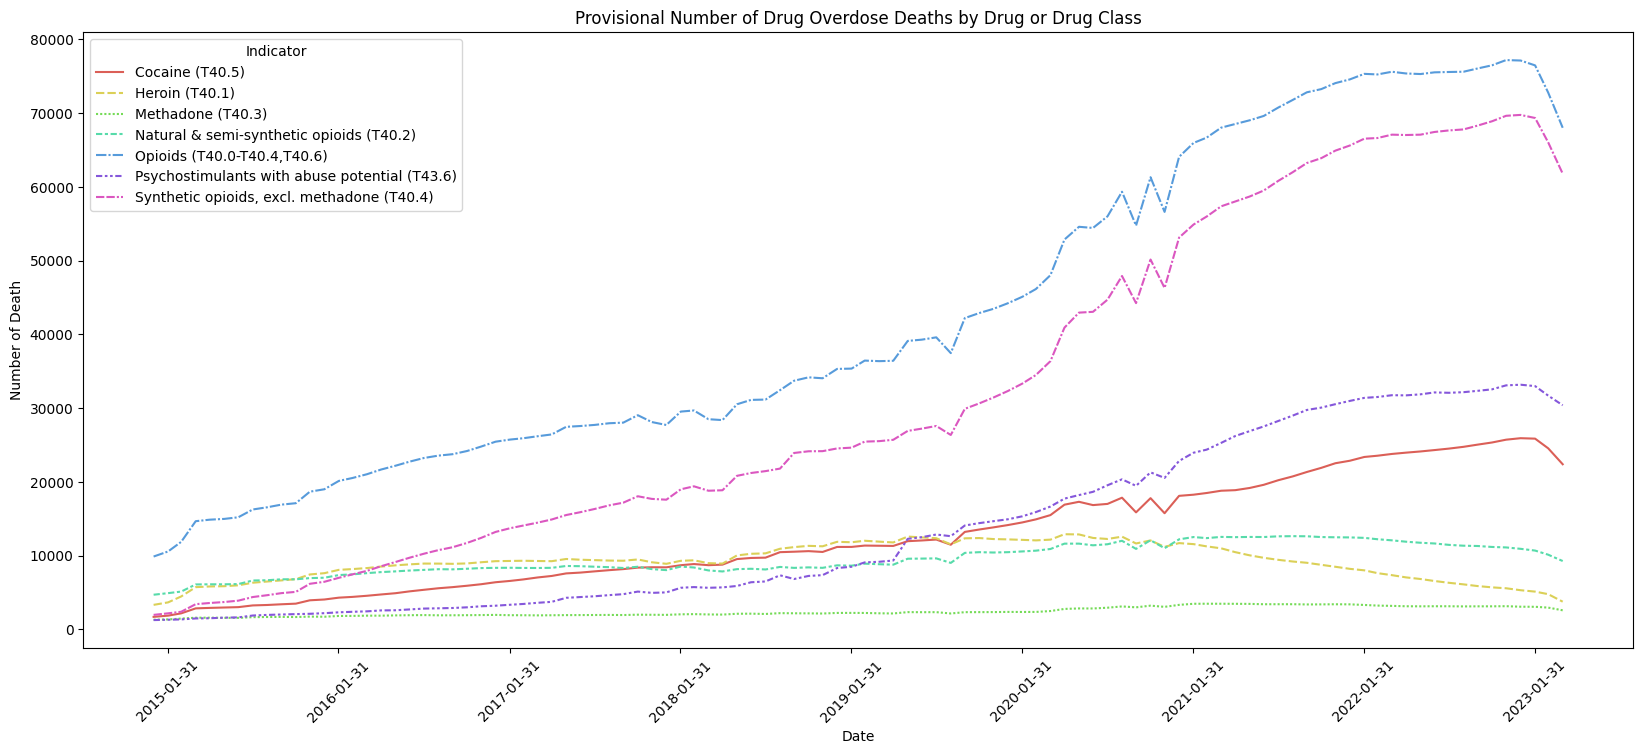

In [ ]:
plt.figure(figsize=(20,8))
sns.lineplot(x='Date', y='Data_value', hue='Indicator', style='Indicator',data=table3, palette="hls")
plt.xticks(pd.date_range('2015-01', '2023-04', freq='12M'), rotation=45)
plt.ylabel('Number of Death')
plt.title('Provisional Number of Drug Overdose Deaths by Drug or Drug Class')
#plt.xticks(rotation=90)

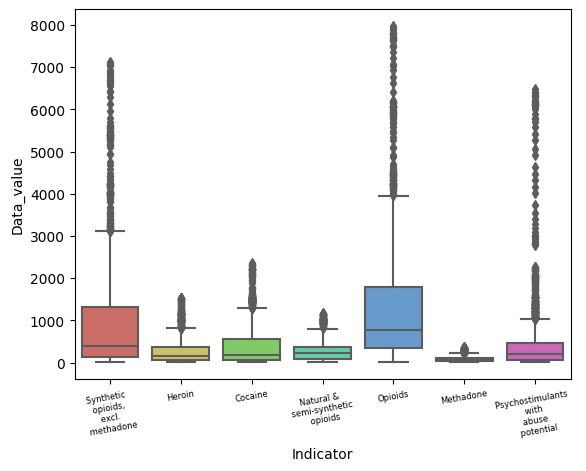

In [ ]:
#Check the distribution and outlier
# For Drug Overdose Deaths by Drug or Drug Class
indicator_rename = {
    'Cocaine (T40.5)': 'Cocaine',
    'Heroin (T40.1)': 'Heroin',
    'Methadone (T40.3)': 'Methadone',
    'Natural & semi-synthetic opioids (T40.2)':'Natural & semi-synthetic opioids',
    'Opioids (T40.0-T40.4,T40.6)':'Opioids',
    'Psychostimulants with abuse potential (T43.6)':'Psychostimulants with abuse potential',
    'Synthetic opioids, excl. methadone (T40.4)':'Synthetic opioids, excl. methadone'
}

# Rename the indicators in the DataFrame
df2_renamed = df2.replace({"Indicator": indicator_rename})

# Plotting the boxplot with renamed indicators
sns.boxplot(x=df2_renamed['Indicator'], y=df2_renamed['Data_value'], palette="hls")

tick_labels = ['Synthetic \n opioids, \n excl. \n methadone', 'Heroin', 'Cocaine', 'Natural & \n semi-synthetic \n opioids', 'Opioids', 'Methadone', 'Psychostimulants \n with \n abuse \n potential']
plt.xticks([0, 1, 2, 3, 4, 5, 6], tick_labels, fontsize=6)
plt.xticks(rotation=10)
plt.show()

Opio is the worst

<Axes: >

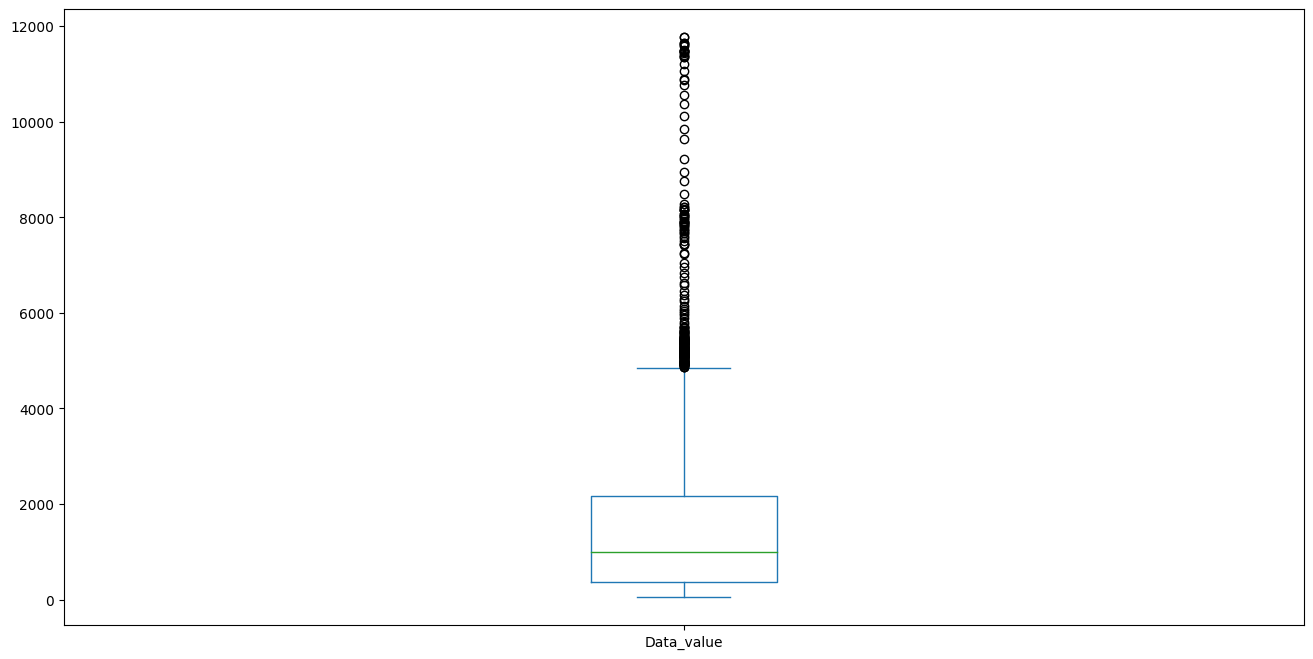

In [ ]:
# For death of drug overdose
df1['Data_value'].plot(kind='box', figsize=[16,8])

In [ ]:
df2.isnull().sum()

State                               0
Year                                0
Month                               0
Period                              0
Indicator                           0
Data_value                       8790
Percent_complete                    0
Percent_pending_investigation       0
State_name                          0
Footnote                         2552
Footnote_symbol                  2688
Predicted_value                  8558
Date                                0
dtype: int64

In [ ]:
df1[df1['State']=='LA']

,State,Year,Month,Period,Indicator,Data_value,Percent_complete,Percent_pending_investigation,State_name,Footnote,Footnote_symbol,Predicted_value,Date
21600,LA,2015,April,12 month-ending,Number of Drug Overdose Deaths,796.0,100,0.052001,Louisiana,Numbers may differ from published reports usin...,**,798,2015-04-01
21605,LA,2015,August,12 month-ending,Number of Drug Overdose Deaths,823.0,100,0.076854,Louisiana,Numbers may differ from published reports usin...,**,827,2015-08-01
21607,LA,2015,December,12 month-ending,Number of Drug Overdose Deaths,875.0,100,0.084256,Louisiana,Numbers may differ from published reports usin...,**,880,2015-12-01
21610,LA,2015,February,12 month-ending,Number of Drug Overdose Deaths,785.0,100,0.043035,Louisiana,Numbers may differ from published reports usin...,**,786,2015-02-01
21612,LA,2015,January,12 month-ending,Number of Drug Overdose Deaths,782.0,100,0.036281,Louisiana,Numbers may differ from published reports usin...,**,782,2015-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21887,LA,2022,September,12 month-ending,Number of Drug Overdose Deaths,2453.0,100,0.022698,Louisiana,<NA>,<NA>,2453,2022-09-01
21889,LA,2023,April,12 month-ending,Number of Drug Overdose Deaths,2300.0,100,0.037743,Louisiana,Underreported due to incomplete data.,*,2302,2023-04-01
21891,LA,2023,February,12 month-ending,Number of Drug Overdose Deaths,2362.0,100,0.031601,Louisiana,Underreported due to incomplete data.,*,2362,2023-02-01
21895,LA,2023,January,12 month-ending,Number of Drug Overdose Deaths,2387.0,100,0.027237,Louisiana,Underreported due to incomplete data.,*,2387,2023-01-01


In [ ]:
df2.corr()

,Year,Data_value,Percent_pending_investigation,Predicted_value
Year,1.000000,0.193631,0.040629,0.192657
Data_value,0.193631,1.000000,0.176930,0.999641
Percent_pending_investigation,0.040629,0.176930,1.000000,0.174367
Predicted_value,0.192657,0.999641,0.174367,1.000000


The predicted_value(provisional estimates of drug overdose deaths) comes from the NVSS which uses the Data_value(reported drug overdose deaths) 6 months before to predict. (Given recent improvements in data timeliness, starting in February 2022, the 6-month lag was shortened to 4 months.)
So the Predicted_value is highly correlated with the Data_value.

In [ ]:
df2['Diff']=abs(df2['Predicted_value']-df2['Data_value'])

In [ ]:
df2['Diff']

1         <NA>
2         <NA>
3         <NA>
8         <NA>
9         <NA>
         ...  
59994     19.0
59995     23.0
59996    210.0
59997    214.0
59998    124.0
Name: Diff, Length: 33600, dtype: Float64

In [ ]:
table4 = pd.pivot_table(df2,values = 'Diff',index = ['Indicator','Date'],aggfunc='sum')
data_diff = table4.reset_index()

Text(0.5, 1.0, 'Difference between real value and predicted value')

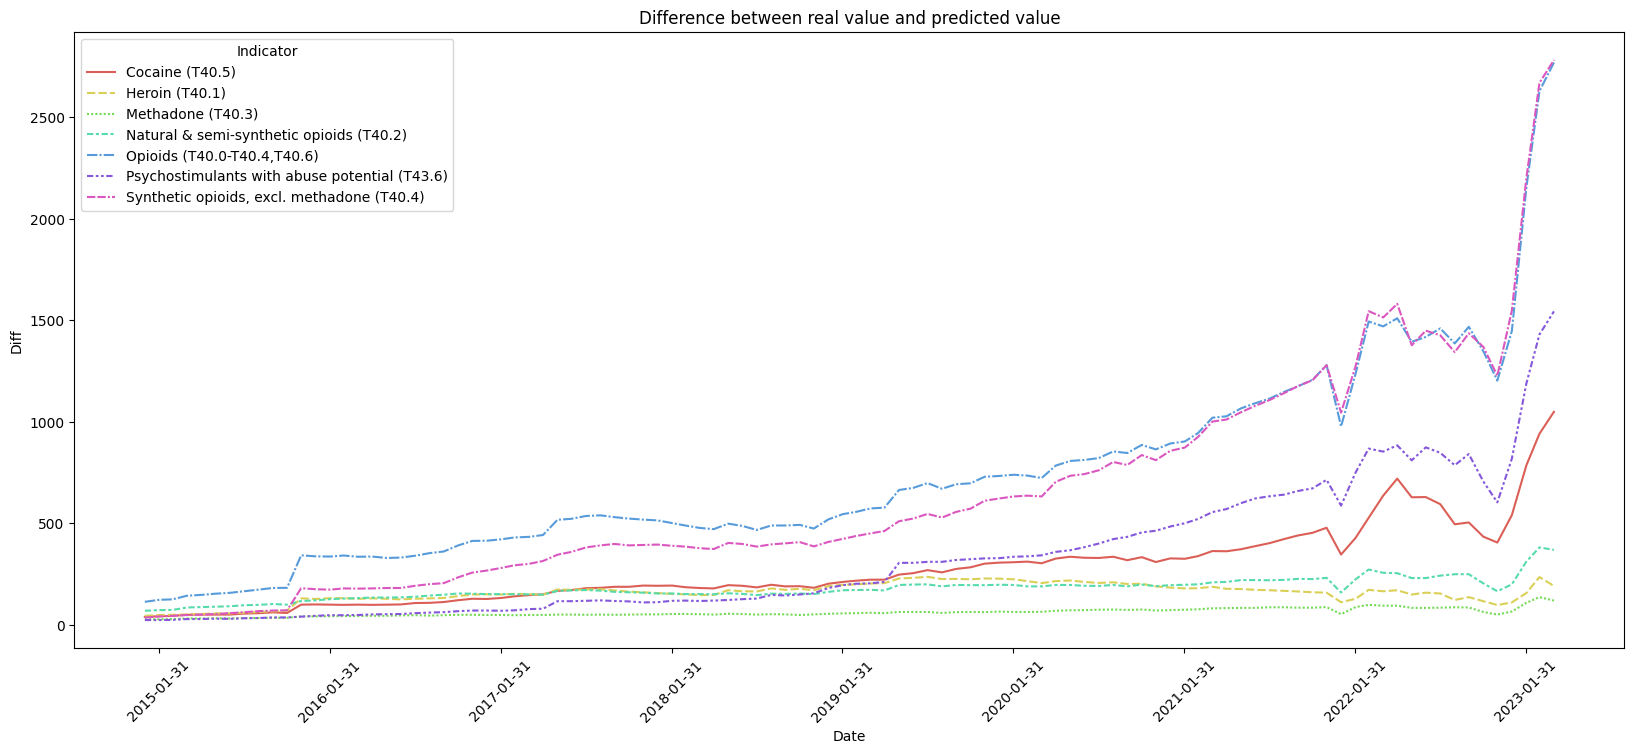

In [ ]:
plt.figure(figsize=(20,8))
sns.lineplot(x='Date', y='Diff', hue='Indicator', style='Indicator',data=table4, palette="hls")
plt.xticks(pd.date_range('2015-01', '2023-04', freq='12M'), rotation=45)
plt.title('Difference between real value and predicted value')
#plt.xticks(rotation=90)

From the plot we can see that the difference between real data and the predicted data is not very big. But basically, the difference is increasing over time. We can see that the fluctuation is quite intensive after 2022, which may because that provisional estimates of drug overdose deaths have traditionally been reported 6 months after the date of death, but starting in February 2022, the 6-month lag was shortened to 4 months.